Marie Keller
Faiza Khurshid
Lara Schmalenstroer

## Exercise 2 (Object-oriented Programming: Rendering Text, 13 Points)

The first class Curve should be able to represent a polygonal curve as a sequence of points in the
plane. It should at least provide methods to add and remove points, to translate the curve by a
given 2D vector, to scale it by a given factor, and to compute a tight axis-aligned bounding box
around the curve. (4P)

In [279]:
class Curve:
    """The class curve accepts a list of two-dimensional points as an input. It provides methods to get the coordinates, \
    the x- and y-coordinates (Curve.get_coordinates(),Curve.get_x_coordinates(),Curve.get_y_coordinates). Points can\
    be added to the list (Curve.add_points([x,y])) and removed from it (Curve.remove_points(point)). The points can be \
    translated and scaled."""
    
    def __init__(self,pointlist):
        self.points=pointlist
        self.x_values=[self.points[i][0] for i in range(len(self.points))]
        self.y_values=[self.points[i][1] for i in range(len(self.points))]
    
    def show_curve(self):
        import matplotlib.pyplot as plt
        curve_plot=plt.plot(self.x_values,self.y_values,color='purple')
        #plt.show()
        return curve_plot
        
    def get_coordinates(self):
        """The get_coordinates() method returns a nested list, cotaining the coordinates of the curve."""
        return self.points
    
    #def __repr__(self):
        #return self.points
        
    def get_x_coordinates(self):
        """The get_x_coordinates() method returns a list of the x coordinates of the curve."""
        return self.x_values
    
    def get_y_coordinates(self):
        """The get_y_coordinates() method returns a list of the y coordinates of the curve."""
        return self.y_values
    
    def add_points(self,new_point):
        self.points.append(new_point)
        self.x_values.append(new_point[0])
        self.y_values.append(new_point[1])
        return 
    
    def remove_points(self,point):
        """The remove_points(point) method removes a given point from the list of points. It either accepts a two-dimen\
        sional point or an index as input. If the point or inex is not in the list of points, an error message is returned.\
        Else the list of points is returned."""
        assert type(point) is list or type(point) is int, "The given point must either be a point or an index of the list\
        of points: %r" % point
        if type(point)==list and len(point)==2:
            if point in self.points:
                self.points.remove(point)
                self.x_values.remove(point[0])
                self.y_values.remove(point[1])
            else:
                raise ValueError("The point does not occur in the list of points.")
        elif type(point)==int:
            indices=[i for i in range(len(self.points))]
            if point in indices:
                self.points.remove(self.points[point])
                self.x_values.remove(self.x_values[point])
                self.y_values.remove(self.y_values[point])
            else:
                raise IndexError("The given index is not in the list.")
        elif len(point)>2:
            raise ValueError("The given point must contain two coordinates.")
        return 
    
    def translate(self,vector):
        """The translate(vector) method translates the points by a given vector. The method accepts a two-dimensional\
        vector and returns an error message if this requirement is not fulfilled. The method returns the resulting set\
        of points."""
        assert type(vector) is list, "The input must be a vector of type list: %r" % vector
        assert len(vector)==2, "The input must have two dimensions: %r" % vector
        points_new=[]
        for i in range(len(self.x_values)):
            self.x_values[i]+=vector[0]
            self.y_values[i]+=vector[1]
            self.points[i]=[self.x_values[i],self.y_values[i]]
        return self.points[i]
    
    def scale(self,factor):
        """The scale(factor) method returns the set of points, scaled by a given factor. As input, an integer or float \
        number is accepted."""
        assert type(factor) is int or type(factor) is float, "The factor must be of type int or float: %r" % factor
        self.points=[[element[0]*factor,element[1]*factor] for element in self.points]
        self.x_values=[element*factor for element in self.x_values]
        self.y_values=[element*factor for element in self.y_values]
        return
        
    def show_box(self):
        import matplotlib.pyplot as plt
        max_x=max(self.x_values)
        max_y=max(self.y_values)
        min_x=min(self.x_values)
        min_y=min(self.y_values)
        box_edges=[[max_x,max_y],[max_x,min_y],[min_x,min_y],[min_x,max_y],[max_x,max_y]]
        box_x=[box_edges[i][0] for i in range(len(box_edges))]
        box_y=[box_edges[i][1] for i in range(len(box_edges))]
        #fig, ax=plt.subplots()
        #plt.scatter(self.x_values,self.y_values,color='pink')
        #plt.plot(self.x_values,self.y_values,color='purple')
        box_plot=plt.plot(box_x,box_y,color='purple')
        #plt.show()
        return box_plot
    
    def show_plots(self):
        import matplotlib.pyplot as plt
        fig, ax=plt.subplots()
        self.show_box()
        self.show_curve()
        plot = plt.show()
        return fig, ax
    
    def max_x(self):
        return max(self.x_values)
        

In [280]:
curve_A=Curve([[0.3,0.9],[0.4,0.9],[0.6,0],[0.5,0],[0.3,0.9]])

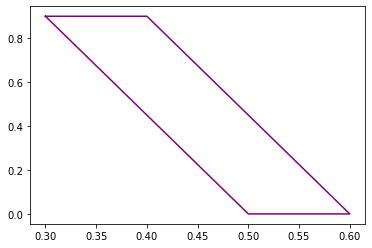

In [281]:
curve_A.show_curve()

In [282]:
curve_A.get_coordinates()

[[0.3, 0.9], [0.4, 0.9], [0.6, 0], [0.5, 0], [0.3, 0.9]]

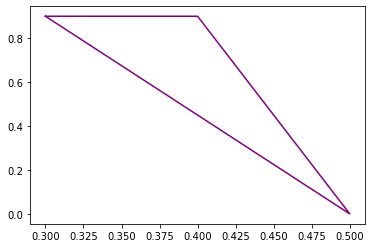

In [283]:
curve_A.remove_points(2)
curve_A.show_curve()

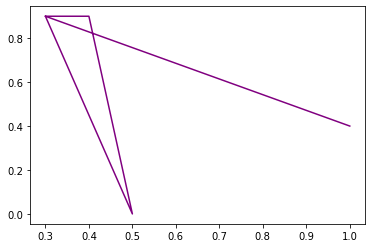

In [284]:
curve_A.add_points([1, 0.4])
curve_A.show_curve()

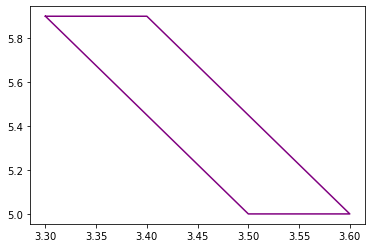

In [285]:
curve_A=Curve([[0.3,0.9],[0.4,0.9],[0.6,0],[0.5,0],[0.3,0.9]])
curve_A.translate([3,5])
curve_A.show_curve()

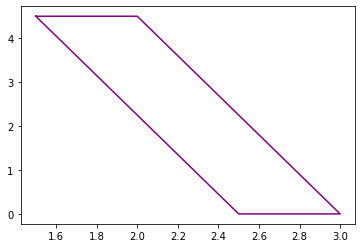

In [286]:
curve_A=Curve([[0.3,0.9],[0.4,0.9],[0.6,0],[0.5,0],[0.3,0.9]])
curve_A.scale(5)
curve_A.show_curve()

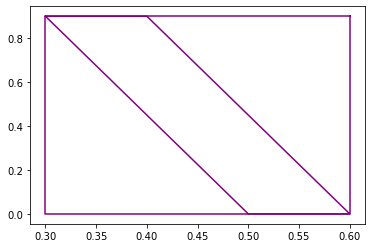

In [287]:
curve_A=Curve([[0.3,0.9],[0.4,0.9],[0.6,0],[0.5,0],[0.3,0.9]])
curve_A.show_curve()
curve_A.show_box()

Instances of the second class Character should represent a letter from the alphabet, which is specified during instantiation, as a suitable set of polygons. To save you the work of having to design your own font, we provide a JSON file that includes a polygonal representation of each letter. The class should permit translating and scaling the letter, and computing its bounding box. 

In [289]:
#found how to open a JSON file into a dictionary at https://www.w3schools.com/python/python_json.asp

with open('letters_geo.json','r') as file:
    letters=file.read()

import json
dict_letters=json.loads(letters)

In [290]:
class Character:
    """The class Character accepts a single letter and a dictionary of letters with their \
    representation as polygons as an input. It provides methods to show the letter as a\
    representation of its curves (show_letter), to translate and scale the letter (scale_letter, translate_letter), \
    to give the maximum x-value of a letter (max_x) and to calculate a bounding box (calculate_box).""" 
    
    def __init__(self,letter,dict_letters):
        self.letter=letter
        self.dict=dict_letters
        self.list_letter=self.dict[self.letter]
        self.curve_list=[]
        for i in range(len(self.list_letter)):
            curve=Curve(self.list_letter[i])
            self.curve_list.append(curve)
        self.letter_xmax = 0
        
    
    def get_curve_list(self):
        for i in range(len(self.list_letter)):
            curve=Curve(self.list_letter[i])
            self.curve_list.append(curve)
        return self.curve_list
    
    def show_letter(self):
        """The show_letter method returns a plot with all curves represented by the input letter."""
        import matplotlib.pyplot as plt
        fig, ax=plt.subplots()
        for i in range(len(self.curve_list)):
            self.curve_list[i].show_curve()
        plt.show()
        return 
    
    def calculate_box(self):
        import matplotlib.pyplot as plt
        max_x=0
        max_y=0
        min_x=100
        min_y=100
        for curve in self.curve_list:
            if max(curve.x_values) > max_x:
                max_x=max(curve.x_values)
            if min(curve.x_values) < min_x:
                min_x=min(curve.x_values)
            if max(curve.y_values) > max_y:
                max_y=max(curve.y_values) 
            if min(curve.y_values) < min_y:
                min_y=min(curve.y_values)
        box_edges=[[max_x,max_y],[max_x,min_y],[min_x,min_y],[min_x,max_y],[max_x,max_y]]
        box_x=[box_edges[i][0] for i in range(len(box_edges))]
        box_y=[box_edges[i][1] for i in range(len(box_edges))]
        box_plot=plt.plot(box_x,box_y,color='purple')
        return box_plot
    
    def scale_letter(self,factor):
        """The scale_letter method scales all curves represented in the input letter by a given \
        factor and returns the scaled values."""
        for curve in self.curve_list: 
            curve.scale(factor)
        return 
    
    def translate_letter(self,vector):
        """The translate_letter method translates all curves represented in the input letter by a \
        given two dimensional vector and returns the translated values."""
        self.translate_letter_list = [0]
        for curve in self.curve_list: 
            self.translate_letter_list.append(curve.translate(vector))
        return self.translate_letter_list
   
    
    def max_x(self):
        """The max_x method returns the maximum x-coordinate of all the points inside the curve representing \
        the input letter."""
        x_list = []
        for curve in self.curve_list:
            x_list.append(max(curve.get_x_coordinates()))
        if max(x_list)>self.letter_xmax:
            self.letter_xmax=max(x_list)
        return self.letter_xmax

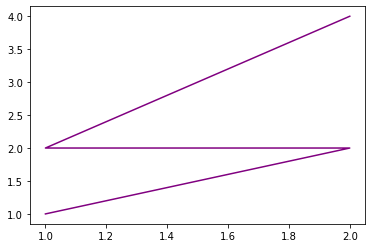

In [291]:
L=Curve([[1,1],[2,2],[1,2],[2,4]])
L.show_curve()

In [292]:
letter_R = Character('R', dict_letters)
letter_R.list_letter

[[[0.06745098039215686, 0.8533333333333334],
  [0.17098039215686275, 0.8533333333333334],
  [0.17098039215686275, 0.0],
  [0.06745098039215686, 0.0],
  [0.06745098039215686, 0.8533333333333334]],
 [[0.2192156862745098, 0.7486274509803922],
  [0.2192156862745098, 0.8533333333333334],
  [0.4627450980392157, 0.8533333333333334],
  [0.5807843137254902, 0.7349019607843137],
  [0.5807843137254902, 0.5027450980392156],
  [0.46627450980392154, 0.3764705882352941],
  [0.2192156862745098, 0.3764705882352941],
  [0.2192156862745098, 0.4811764705882353],
  [0.4168627450980392, 0.4811764705882353],
  [0.4772549019607843, 0.5380392156862746],
  [0.4772549019607843, 0.6913725490196079],
  [0.4168627450980392, 0.7486274509803922],
  [0.2192156862745098, 0.7486274509803922]],
 [[0.3180392156862745, 0.3262745098039216],
  [0.423921568627451, 0.3262745098039216],
  [0.5650980392156862, 0.0],
  [0.45647058823529413, 0.0],
  [0.3180392156862745, 0.3262745098039216]]]

In [293]:
letter_R.max_x()

0.5807843137254902

In [294]:
letter_R.get_curve_list()

In [295]:
letter_R.curve_list[1].get_x_coordinates()

[0.2192156862745098,
 0.2192156862745098,
 0.4627450980392157,
 0.5807843137254902,
 0.5807843137254902,
 0.46627450980392154,
 0.2192156862745098,
 0.2192156862745098,
 0.4168627450980392,
 0.4772549019607843,
 0.4772549019607843,
 0.4168627450980392,
 0.2192156862745098]

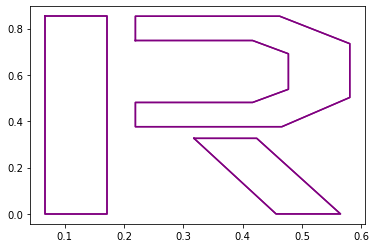

In [296]:
letter_R.show_letter()

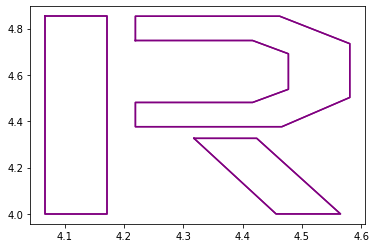

In [297]:
letter_R.translate_letter([4,4])
letter_R.show_letter()

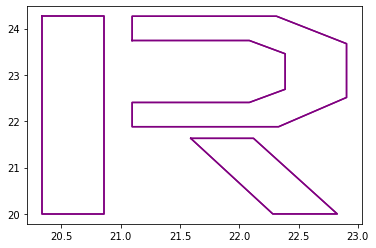

In [298]:
letter_R.scale_letter(5)
letter_R.show_letter()

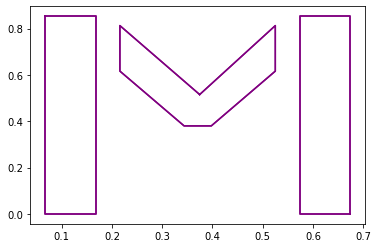

In [299]:
marie = Character('M',dict_letters)
marie.get_curve_list()
marie.show_letter()

A third class Text should represent a given string by creating corresponding Character objects
and arranging them next to each other. It should also permit changing the font size by scaling
the overall text, and have a method to render it into an image. For rendering, feel free to use the
matplotlib Python package. (4P)


In [300]:
with open('letters_geo.json','r') as file:
    letters=file.read()

import json
dict_letters=json.loads(letters)

In [301]:
class Text:
    """The class Text accepts a string with letters as an input. It provides methods to show  the \
    string as single letters (show_string) and to arrange them next to each other in the correct \
    order (arrange_string). It provides a method to scale the text size (scale_string) and a method \
    to render it into an image (render_string)""" 
    
    def __init__ (self, string):
        self.string = string.upper()
        self.string_list = [char for char in self.string]
        self.character_list = []
        for i in range (len(self.string_list)):
            character = Character(self.string_list[i], dict_letters)
            self.character_list.append(character.get_curve_list())
        
        self.xmax_list=[]
        self.xmax_list_letters = [0]
        self.arrange_list = [0]
        for i in range(len(self.character_list)):
            for curve in self.character_list[i]:
                vektor = [self.xmax_list_letters[i] + 0.025, 0]
                self.arrange_list.append(curve.translate(vektor))
            for curve in self.character_list[i]:
                self.xmax_list.append(curve.max_x())
            self.xmax_list_letters.append(max(self.xmax_list))
            self.xmax_list=[]
            
          
    def show_letters (self):
        """The show_letters method represents the input string by plotting its single letters into \
        one graph."""
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        for i in range (len(self.character_list)):
            for j in range (len(self.character_list[i])):
                self.character_list[i][j].show_curve()
        plt.show()
        return       
        
    
    def scale_string(self,factor):
        """The scale_string method scales the input string by an input factor."""
        for i in range(len(self.character_list)):
            for curve in self.character_list[i]:
                curve.scale(factor)
                
    def rendering (self):
        """The rendering method saves the plottet input string into an png image."""
        output = 'Image of ' + str(self.string) + 'png'
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        for i in range (len(self.character_list)):
            for j in range (len(self.character_list[i])):
                self.character_list[i][j].show_curve()
        plt.savefig(output)
        


In [302]:
bonn = Text('Bonn')
bonn.string_list

['B', 'O', 'N', 'N']

In [303]:
bonn.xmax_list_letters

[0,
 0.5995098039215686,
 1.2315686274509803,
 1.8710784313725488,
 2.5105882352941173]

In [304]:
bonn.arrange_list

[0,
 [0.2453921568627451, 0.7486274509803922],
 [0.09245098039215685, 0.8533333333333334],
 [0.2453921568627451, 0.7486274509803922],
 [0.09245098039215685, 0.8533333333333334],
 [0.8111764705882353, 0.8533333333333334],
 [0.9872549019607844, 0.7486274509803922],
 [0.8111764705882353, 0.8533333333333334],
 [0.9872549019607844, 0.7486274509803922],
 [1.8710784313725488, 0.0],
 [1.324019607843137, 0.8533333333333334],
 [1.463627450980392, 0.8411764705882353],
 [1.8710784313725488, 0.0],
 [1.324019607843137, 0.8533333333333334],
 [1.463627450980392, 0.8411764705882353],
 [2.5105882352941173, 0.0],
 [1.9635294117647055, 0.8533333333333334],
 [2.1031372549019607, 0.8411764705882353],
 [2.5105882352941173, 0.0],
 [1.9635294117647055, 0.8533333333333334],
 [2.1031372549019607, 0.8411764705882353]]

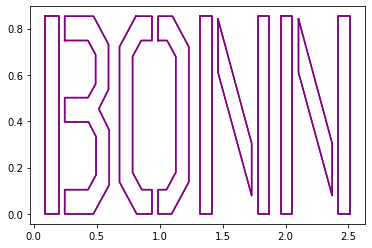

In [305]:
bonn.show_letters()

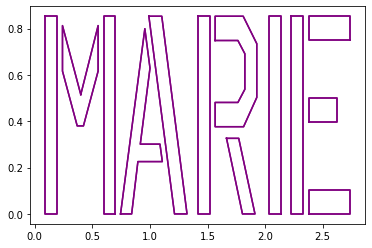

In [263]:
.rendering()

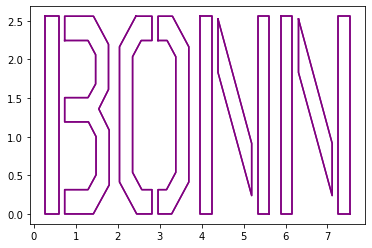

In [306]:
bonn.scale_string(3)
bonn.show_letters()

In [311]:
with open('letters_geo.json','r') as file:
    letters=file.read()

import json
dict_letters=json.loads(letters)

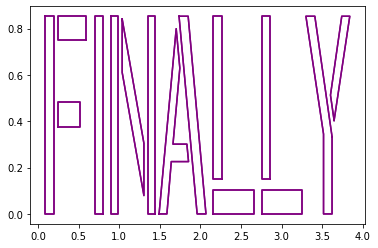

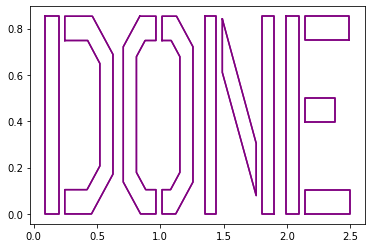

In [312]:
str1 = Text('Finally')
str1.rendering()

dict_letters=json.loads(letters)

str2 = Text('done')
str2.rendering()